In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_auc_score,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To use statistical functions
import scipy.stats as stats

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/allCarsNoCommas.csv")

In [5]:
df.shape

(33842, 12)

In [6]:
df.head()

,url,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
0,/ad/30926610,Toyota RAV4,XT-R D-4D,995,Manual,39.8 mpg,Diesel,2005,1995cc,117000 miles,Black,Estate
1,/ad/30103186,Toyota Yaris,s 1.8 VVT-i SR Hatchback,"1,000",Manual,39.2 mpg,Petrol,2007,1798cc,137669 miles,Red,Hatchback
2,/ad/30266983,Toyota Avensis,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,"1,200",Manual,62.8 mpg,Diesel,2012,2000cc,338345 miles,Silver,Other
3,/ad/30926125,Toyota Corolla,a 1.4 S 3dr Hatchback,"1,295",Manual,41.5 mpg,Petrol,2001,1398cc,59000 miles,Red,Hatchback
4,/ad/29313140,Toyota Auris,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,"1,495",Manual,48.7 mpg,Petrol,2009,1329cc,134000 miles,Red,Hatchback


In [7]:
df.tail()

,url,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
33837,/ad/30908920,Toyota Yaris,1.5 Hybrid Design 5dr CVT Hatchback,"16,985",Automatic,68.9 mpg,Hybrid,2020,1490cc,6798 miles,Blue,Hatchback
33838,/ad/30833211,Toyota Yaris,s 1.5 Hybrid Design 5dr CVT Hatchback,"17,222",Automatic,68.9 mpg,Hybrid,2021,1500cc,17027 miles,Black,Hatchback
33839,/ad/30908921,Toyota Yaris,1.5 Hybrid Design 5dr CVT Hatchback,"16,985",Automatic,68.9 mpg,Hybrid,2022,1490cc,21200 miles,Blue,Hatchback
33840,/ad/30904641,Toyota Corolla,1.8 VVT-h GPF Icon Hatchback 5dr Petrol Hybrid...,"16,700",Automatic,62.8 mpg,Hybrid,2021,1798cc,22000 miles,Blue,Hatchback
33841,/ad/30487797,Toyota Yaris,s 1.5 Hybrid Icon 5dr CVT Hatchback,"16,000",Automatic,68.9 mpg,Hybrid,2021,1500cc,24553 miles,White,Hatchback


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33842 entries, 0 to 33841
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                33842 non-null  object
 1   name               33842 non-null  object
 2   model              33842 non-null  object
 3   price              33842 non-null  object
 4   transmission       33842 non-null  object
 5   miles_per_gallaon  33842 non-null  object
 6   fuel               33842 non-null  object
 7   year               33842 non-null  int64 
 8   cubic_capacity     33842 non-null  object
 9   milage             33842 non-null  object
 10  color              33842 non-null  object
 11  type               33800 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB


In [9]:
df[df.duplicated()].count()

url                  2465
name                 2465
model                2465
price                2465
transmission         2465
miles_per_gallaon    2465
fuel                 2465
year                 2465
cubic_capacity       2465
milage               2465
color                2465
type                 2462
dtype: int64

In [10]:
df.nunique()

url                  31377
name                   317
model                16697
price                 6670
transmission             4
miles_per_gallaon      264
fuel                     4
year                    33
cubic_capacity         326
milage               18020
color                  755
type                    18
dtype: int64

In [11]:
df.isna().sum()

url                   0
name                  0
model                 0
price                 0
transmission          0
miles_per_gallaon     0
fuel                  0
year                  0
cubic_capacity        0
milage                0
color                 0
type                 42
dtype: int64

In [12]:
df2 = df.drop_duplicates(subset=['url'])

In [13]:
df2[df2.duplicated()].count()

url                  0
name                 0
model                0
price                0
transmission         0
miles_per_gallaon    0
fuel                 0
year                 0
cubic_capacity       0
milage               0
color                0
type                 0
dtype: int64

In [14]:
df2.shape

(31377, 12)

In [15]:
df2["cubic_capacity"]= df2["cubic_capacity"].str.replace("cc","")

In [16]:
df2.head()

,url,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
0,/ad/30926610,Toyota RAV4,XT-R D-4D,995,Manual,39.8 mpg,Diesel,2005,1995,117000 miles,Black,Estate
1,/ad/30103186,Toyota Yaris,s 1.8 VVT-i SR Hatchback,"1,000",Manual,39.2 mpg,Petrol,2007,1798,137669 miles,Red,Hatchback
2,/ad/30266983,Toyota Avensis,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,"1,200",Manual,62.8 mpg,Diesel,2012,2000,338345 miles,Silver,Other
3,/ad/30926125,Toyota Corolla,a 1.4 S 3dr Hatchback,"1,295",Manual,41.5 mpg,Petrol,2001,1398,59000 miles,Red,Hatchback
4,/ad/29313140,Toyota Auris,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,"1,495",Manual,48.7 mpg,Petrol,2009,1329,134000 miles,Red,Hatchback


In [17]:
df2["milage"]= df2["milage"].str.replace(" miles","")

In [18]:
df2.head()

,url,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
0,/ad/30926610,Toyota RAV4,XT-R D-4D,995,Manual,39.8 mpg,Diesel,2005,1995,117000,Black,Estate
1,/ad/30103186,Toyota Yaris,s 1.8 VVT-i SR Hatchback,"1,000",Manual,39.2 mpg,Petrol,2007,1798,137669,Red,Hatchback
2,/ad/30266983,Toyota Avensis,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,"1,200",Manual,62.8 mpg,Diesel,2012,2000,338345,Silver,Other
3,/ad/30926125,Toyota Corolla,a 1.4 S 3dr Hatchback,"1,295",Manual,41.5 mpg,Petrol,2001,1398,59000,Red,Hatchback
4,/ad/29313140,Toyota Auris,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,"1,495",Manual,48.7 mpg,Petrol,2009,1329,134000,Red,Hatchback


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31377 entries, 0 to 33841
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                31377 non-null  object
 1   name               31377 non-null  object
 2   model              31377 non-null  object
 3   price              31377 non-null  object
 4   transmission       31377 non-null  object
 5   miles_per_gallaon  31377 non-null  object
 6   fuel               31377 non-null  object
 7   year               31377 non-null  int64 
 8   cubic_capacity     31377 non-null  object
 9   milage             31377 non-null  object
 10  color              31377 non-null  object
 11  type               31338 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB


In [20]:
df2["miles_per_gallaon"]= df2["miles_per_gallaon"].str.replace(" mpg","")

In [21]:
df2.head()

,url,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
0,/ad/30926610,Toyota RAV4,XT-R D-4D,995,Manual,39.8,Diesel,2005,1995,117000,Black,Estate
1,/ad/30103186,Toyota Yaris,s 1.8 VVT-i SR Hatchback,"1,000",Manual,39.2,Petrol,2007,1798,137669,Red,Hatchback
2,/ad/30266983,Toyota Avensis,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,"1,200",Manual,62.8,Diesel,2012,2000,338345,Silver,Other
3,/ad/30926125,Toyota Corolla,a 1.4 S 3dr Hatchback,"1,295",Manual,41.5,Petrol,2001,1398,59000,Red,Hatchback
4,/ad/29313140,Toyota Auris,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,"1,495",Manual,48.7,Petrol,2009,1329,134000,Red,Hatchback


In [22]:
df2.nunique()

url                  31377
name                   317
model                16697
price                 6670
transmission             4
miles_per_gallaon      264
fuel                     4
year                    33
cubic_capacity         326
milage               18020
color                  755
type                    18
dtype: int64

In [23]:
df2['miles_per_gallaon'] = df2['miles_per_gallaon'].astype(str).astype(float)
df2['year'] = df2['year'].astype(str).astype(int)
df2['milage'] = df2['milage'].astype(str).astype(int)
df2['cubic_capacity'] = df2['cubic_capacity'].astype(str).astype(float)

In [24]:
df2.dtypes

url                   object
name                  object
model                 object
price                 object
transmission          object
miles_per_gallaon    float64
fuel                  object
year                   int64
cubic_capacity       float64
milage                 int64
color                 object
type                  object
dtype: object

In [25]:
df2["price"]= df2["price"].str.replace(",","")

In [26]:
df2['price'] = df2['price'].astype(str).astype(int)

In [27]:
df2.dtypes

url                   object
name                  object
model                 object
price                  int64
transmission          object
miles_per_gallaon    float64
fuel                  object
year                   int64
cubic_capacity       float64
milage                 int64
color                 object
type                  object
dtype: object

In [28]:
df3 = df2.copy()
list_str_obj_cols = df3.columns[df3.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df3[str_obj_col] = df3[str_obj_col].astype("category")

In [29]:
df3.dtypes

url                  category
name                 category
model                category
price                   int64
transmission         category
miles_per_gallaon     float64
fuel                 category
year                    int64
cubic_capacity        float64
milage                  int64
color                category
type                 category
dtype: object

In [30]:
df3.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,31377,31377,/ad/20121049,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,31377,317,Nissan Qashqai,1129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,31377,16697,Hatchback,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,31377.000,NaN,NaN,NaN,21278.708,23650.987,695.000,6795.000,15990.000,26493.000,1099900.000
transmission,31377,4,Automatic,13572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
miles_per_gallaon,31377.000,NaN,NaN,NaN,51.050,24.501,0.100,39.200,47.900,57.600,478.000
fuel,31377,4,Petrol,15436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,31377.000,NaN,NaN,NaN,2016.438,5.220,1970.000,2013.000,2018.000,2021.000,2024.000
cubic_capacity,31377.000,NaN,NaN,NaN,1975.273,823.475,0.000,1461.000,1968.000,2143.000,39820.000
milage,31377.000,NaN,NaN,NaN,50663.364,40460.461,0.000,16400.000,42989.000,79000.000,1060000.000


In [31]:
df3.isna().sum()

url                   0
name                  0
model                 0
price                 0
transmission          0
miles_per_gallaon     0
fuel                  0
year                  0
cubic_capacity        0
milage                0
color                 0
type                 39
dtype: int64

In [32]:
imputation = ["type"]
df3[imputation] = df3[imputation].apply(lambda x: x.fillna(x.mode()), axis=0)
df3.isna().sum()

url                   0
name                  0
model                 0
price                 0
transmission          0
miles_per_gallaon     0
fuel                  0
year                  0
cubic_capacity        0
milage                0
color                 0
type                 39
dtype: int64

In [33]:
mode = df3["type"].mode().iat[0]
df3["type"].fillna(mode, inplace =True)
print(df3["type"].isna().sum())
df3["type"].value_counts()

0


Hatchback            10357
SUV                   7776
Estate                4021
Saloon                3472
Coupe                 2004
Convertible           1589
Other                 1053
MPV                    878
Pick Up                144
4X4                     30
4x4                     29
People Carrier          14
Roadster                 4
Station Wagon            2
Passenger Carrier        1
Four Wheel Drive         1
Crossover                1
Sports                   1
Name: type, dtype: int64

In [34]:
df3.shape

(31377, 12)

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31377 entries, 0 to 33841
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   url                31377 non-null  category
 1   name               31377 non-null  category
 2   model              31377 non-null  category
 3   price              31377 non-null  int64   
 4   transmission       31377 non-null  category
 5   miles_per_gallaon  31377 non-null  float64 
 6   fuel               31377 non-null  category
 7   year               31377 non-null  int64   
 8   cubic_capacity     31377 non-null  float64 
 9   milage             31377 non-null  int64   
 10  color              31377 non-null  category
 11  type               31377 non-null  category
dtypes: category(7), float64(2), int64(3)
memory usage: 3.7 MB


In [36]:
df3 = df3.drop("url", axis=1)

In [37]:
df3.head()

,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
0,Toyota RAV4,XT-R D-4D,995,Manual,39.800,Diesel,2005,1995.000,117000,Black,Estate
1,Toyota Yaris,s 1.8 VVT-i SR Hatchback,1000,Manual,39.200,Petrol,2007,1798.000,137669,Red,Hatchback
2,Toyota Avensis,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,1200,Manual,62.800,Diesel,2012,2000.000,338345,Silver,Other
3,Toyota Corolla,a 1.4 S 3dr Hatchback,1295,Manual,41.500,Petrol,2001,1398.000,59000,Red,Hatchback
4,Toyota Auris,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,1495,Manual,48.700,Petrol,2009,1329.000,134000,Red,Hatchback


Exploratory Data Analysis (EDA)

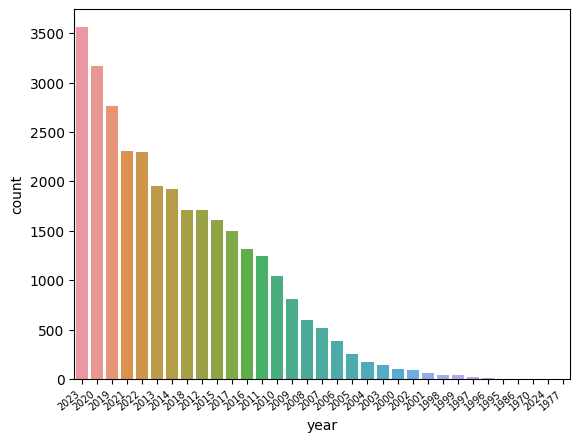

In [38]:
ax = sns.countplot(data=df3,x='year',order=df3['year'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

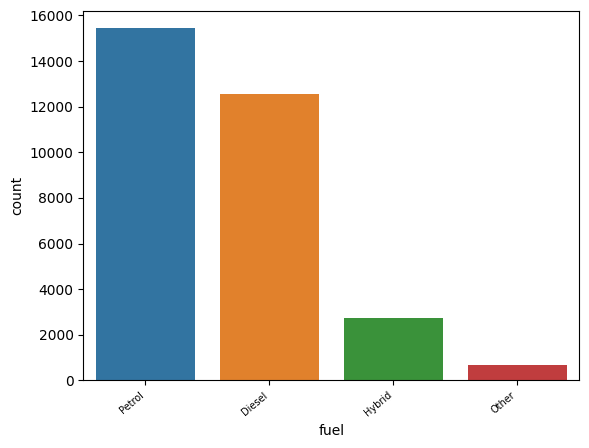

In [39]:
ax = sns.countplot(data=df3,x='fuel',order=df3['fuel'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

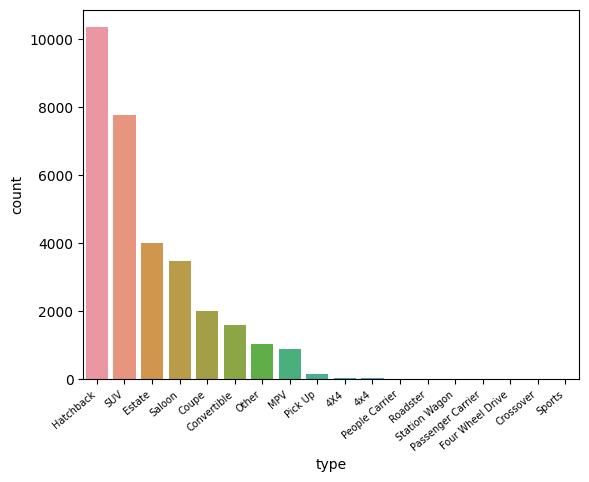

In [40]:
ax = sns.countplot(data=df3,x='type',order=df3['type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

In [41]:
df3["type"]= df3["type"].str.replace("x","X")

In [42]:
df3['type'].value_counts(normalize=True)*100

Hatchback           33.008
SUV                 24.782
Estate              12.815
Saloon              11.065
Coupe                6.387
Convertible          5.064
Other                3.356
MPV                  2.798
Pick Up              0.459
4X4                  0.188
People Carrier       0.045
Roadster             0.013
Station Wagon        0.006
Crossover            0.003
Passenger Carrier    0.003
Sports               0.003
Four Wheel Drive     0.003
Name: type, dtype: float64

In [43]:
df3["milage"].mean()

50663.36402460401

In [44]:
df3["miles_per_gallaon"].mean()

51.04954903273097

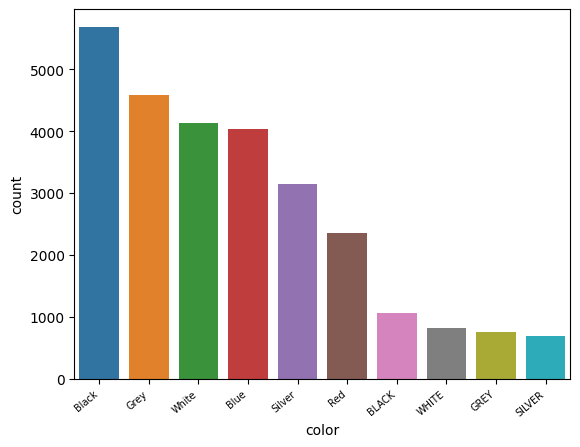

In [45]:
ax = sns.countplot(data=df3,x='color',order=df3['color'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

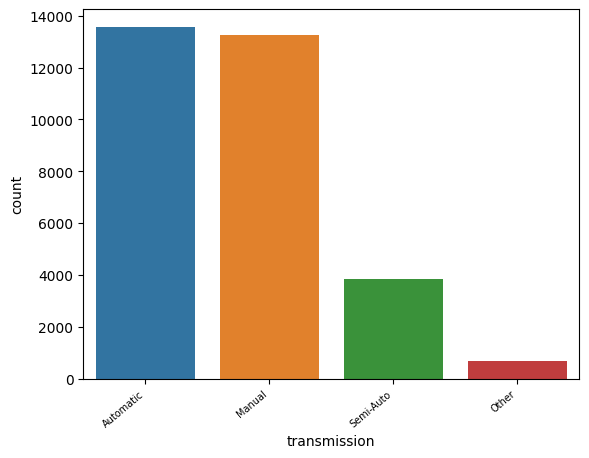

In [46]:
ax = sns.countplot(data=df3,x='transmission',order=df3['transmission'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

In [47]:
df3.sort_values(by="price").tail(10)

,name,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type
29655,Porsche 911,BRABUS 720 HP 3.7T 992 Turbo S Convertible Con...,299995,Automatic,23.300,Petrol,2023,3745.000,100,Grey,Convertible
29654,Porsche 911,BRABUS 820 HP 3.7T 992 Turbo S Coupe Coupe,309995,Automatic,23.500,Petrol,2023,3745.000,100,Black,Coupe
29653,Porsche 911,GT2 RS PDK. HUGE SPECIFICATION. WEISSACH & CLU...,319995,Automatic,23.900,Petrol,2018,3800.000,4155,Silver,Coupe
14487,Mercedes-Benz G Class,BRABUS WIDESTAR 700HP 4.0 G63 V8 BiTurbo AMG SUV,329995,Automatic,21.400,Petrol,2023,3982.000,80,Black,SUV
29652,Porsche 911,GT2 RS 2dr PDK Coupe,339950,Automatic,23.900,Petrol,2018,3800.000,6800,Red,Coupe
14486,Mercedes-Benz G Class,BRABUS WIDESTAR 800 HP 4.0 G63 V8 BiTurbo AMG SUV,359995,Automatic,21.400,Petrol,2023,3982.000,100,Black,SUV
14485,Mercedes-Benz SLR Mclaren,ROADSTER. BELIEVED TO BE 1 OF 9 UK SUPPLIED CA...,379995,Automatic,19.500,Petrol,2007,5439.000,12038,Silver,Convertible
29651,Porsche 911,GT3 RS PDK. WEISSACH & CLUBSPORT PACKS. FRONT ...,379995,Automatic,21.100,Petrol,2023,3996.000,12,Black,Coupe
29650,Porsche 911,4.0 GT3 RS Coupe 2dr Petrol PDK Euro 6 (525 ps...,562800,Automatic,21.100,Petrol,2023,3996.000,39,SILVER,Coupe
14484,Mercedes-Benz B Class,1.8 B180 CDI BLUEEFFICIENCY SE 5d 109 BHP MPV,1099900,Automatic,64.200,Diesel,2014,1796.000,18700,GREY,MPV


In [48]:
def histogram_boxplot(df3, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df3, x=feature, ax=ax_box2, showmeans=True, color="gray"
    )
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df3, x=feature, kde=True, ax=ax_hist2
    )
    ax_hist2.axvline(
        df3[feature].mean(), color="pink", linestyle="--"
    )
    ax_hist2.axvline(
        df3[feature].median(), color="red", linestyle="-"
    )

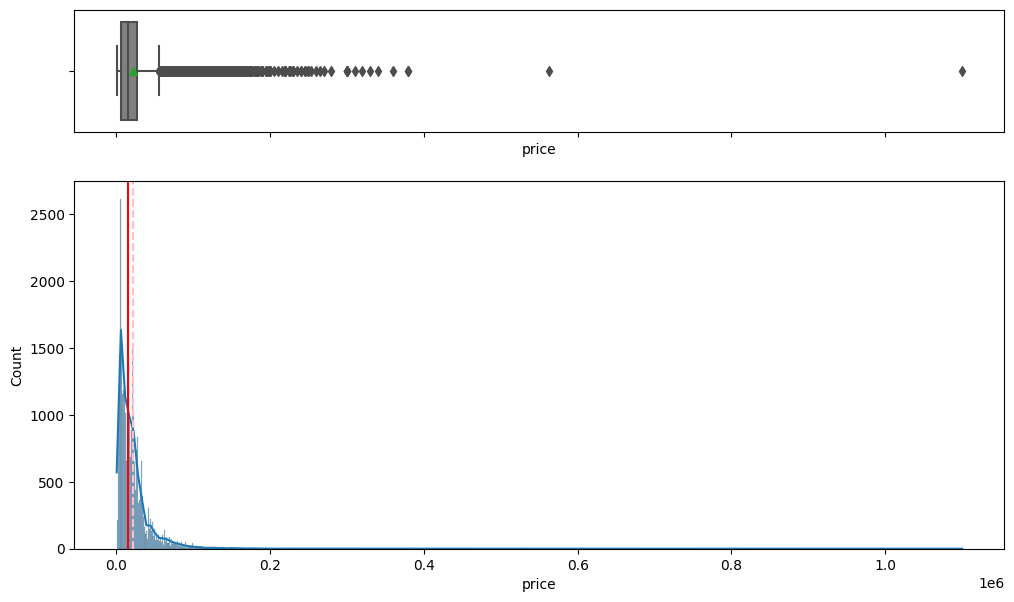

In [49]:
histogram_boxplot(df3, "price")

In [50]:
df3.groupby("type")["miles_per_gallaon"].mean()

type
4X4                 49.551
Convertible         38.465
Coupe               39.830
Crossover           46.300
Estate              50.853
Four Wheel Drive    36.700
Hatchback           56.036
MPV                 53.219
Other               44.915
Passenger Carrier   42.800
People Carrier      45.093
Pick Up             32.396
Roadster            41.100
SUV                 49.968
Saloon              53.223
Sports              40.400
Station Wagon       43.400
Name: miles_per_gallaon, dtype: float64

In [51]:
df3.groupby("type")["price"].mean()

type
4X4                 17002.017
Convertible         22081.018
Coupe               33498.522
Crossover           22695.000
Estate              25046.509
Four Wheel Drive    24880.000
Hatchback           12634.009
MPV                 16414.222
Other               17058.031
Passenger Carrier   55491.000
People Carrier      59199.429
Pick Up             35615.340
Roadster            34447.250
SUV                 29803.318
Saloon              18005.266
Sports               5200.000
Station Wagon       18274.500
Name: price, dtype: float64

In [52]:
df3.groupby("fuel")["miles_per_gallaon"].mean()

fuel
Diesel   52.038
Hybrid   77.301
Other    82.032
Petrol   44.253
Name: miles_per_gallaon, dtype: float64

In [53]:
df3.groupby("fuel")["price"].mean()

fuel
Diesel   18917.442
Hybrid   29163.283
Other    28198.430
Petrol   21497.579
Name: price, dtype: float64

In [54]:
df3.groupby("transmission")["price"].mean()

transmission
Automatic   28361.631
Manual      10704.511
Other       19449.979
Semi-Auto   33137.943
Name: price, dtype: float64

In [55]:
df3.groupby("transmission")["fuel"].value_counts()

transmission  fuel  
Automatic     Diesel    6378
              Petrol    5092
              Hybrid    1585
              Other      517
Manual        Petrol    8206
              Diesel    4710
              Hybrid     237
              Other      115
Other         Petrol     330
              Diesel     233
              Hybrid     117
              Other       24
Semi-Auto     Petrol    1808
              Diesel    1214
              Hybrid     809
              Other        2
Name: fuel, dtype: int64

In [56]:
df3.groupby("transmission")["miles_per_gallaon"].mean()

transmission
Automatic   48.287
Manual      53.315
Other       59.466
Semi-Auto   51.443
Name: miles_per_gallaon, dtype: float64

In [57]:
df3["age"] = df3["year"].max()-df3["year"]

In [58]:
df3.columns

Index(['name', 'model', 'price', 'transmission', 'miles_per_gallaon', 'fuel',
       'year', 'cubic_capacity', 'milage', 'color', 'type', 'age'],
      dtype='object')

In [59]:
df3.corr()

,price,miles_per_gallaon,year,cubic_capacity,milage,age
price,1.000,-0.171,0.469,0.490,-0.466,-0.469
miles_per_gallaon,-0.171,1.000,0.094,-0.281,0.036,-0.094
year,0.469,0.094,1.000,-0.092,-0.705,-1.000
cubic_capacity,0.490,-0.281,-0.092,1.000,0.051,0.092
milage,-0.466,0.036,-0.705,0.051,1.000,0.705
age,-0.469,-0.094,-1.000,0.092,0.705,1.000


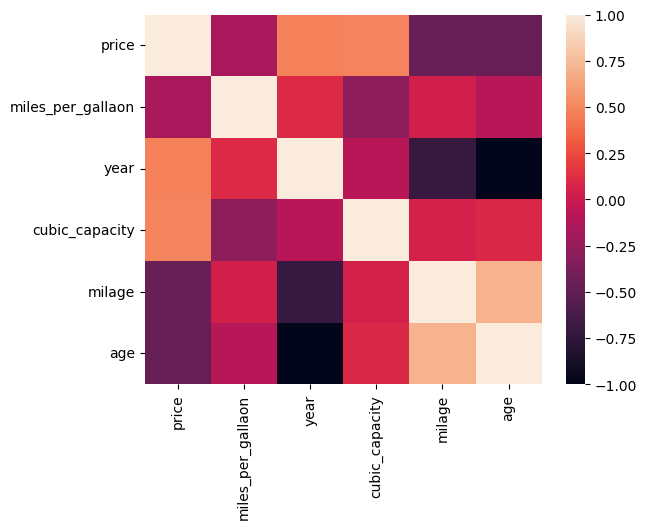

In [60]:
hmap = sns.heatmap(df3.corr())

In [61]:
car_brand= ['Toyota', 'Land Rover', 'Porsche', 'Nissan', 'Ford', 'BMW', 'Volkswagen', 'Mazda', 'Skoda', 'Jaguar', 'Mitsubishi', 'Suzuki', 'Mercedes-Benz', 'Renault', 'Audi']
pat=r'({})'.format('|'.join(car_brand)) + '(.+)'

In [62]:
df3[['car_brand','car_model']] = df3.pop('name').str.extract(pat)

In [63]:
df3

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
0,XT-R D-4D,995,Manual,39.800,Diesel,2005,1995.000,117000,Black,Estate,19,Toyota,RAV4
1,s 1.8 VVT-i SR Hatchback,1000,Manual,39.200,Petrol,2007,1798.000,137669,Red,Hatchback,17,Toyota,Yaris
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,1200,Manual,62.800,Diesel,2012,2000.000,338345,Silver,Other,12,Toyota,Avensis
3,a 1.4 S 3dr Hatchback,1295,Manual,41.500,Petrol,2001,1398.000,59000,Red,Hatchback,23,Toyota,Corolla
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,1495,Manual,48.700,Petrol,2009,1329.000,134000,Red,Hatchback,15,Toyota,Auris
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33837,1.5 Hybrid Design 5dr CVT Hatchback,16985,Automatic,68.900,Hybrid,2020,1490.000,6798,Blue,Hatchback,4,Toyota,Yaris
33838,s 1.5 Hybrid Design 5dr CVT Hatchback,17222,Automatic,68.900,Hybrid,2021,1500.000,17027,Black,Hatchback,3,Toyota,Yaris
33839,1.5 Hybrid Design 5dr CVT Hatchback,16985,Automatic,68.900,Hybrid,2022,1490.000,21200,Blue,Hatchback,2,Toyota,Yaris
33840,1.8 VVT-h GPF Icon Hatchback 5dr Petrol Hybrid...,16700,Automatic,62.800,Hybrid,2021,1798.000,22000,Blue,Hatchback,3,Toyota,Corolla


In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31377 entries, 0 to 33841
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   model              31377 non-null  category
 1   price              31377 non-null  int64   
 2   transmission       31377 non-null  category
 3   miles_per_gallaon  31377 non-null  float64 
 4   fuel               31377 non-null  category
 5   year               31377 non-null  int64   
 6   cubic_capacity     31377 non-null  float64 
 7   milage             31377 non-null  int64   
 8   color              31377 non-null  category
 9   type               31377 non-null  object  
 10  age                31377 non-null  int64   
 11  car_brand          31324 non-null  object  
 12  car_model          31324 non-null  object  
dtypes: category(4), float64(2), int64(4), object(3)
memory usage: 3.2+ MB


In [65]:
df4 = df3.copy()
list_str_obj_cols = df4.columns[df4.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df4[str_obj_col] = df4[str_obj_col].astype("category")

In [66]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31377 entries, 0 to 33841
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   model              31377 non-null  category
 1   price              31377 non-null  int64   
 2   transmission       31377 non-null  category
 3   miles_per_gallaon  31377 non-null  float64 
 4   fuel               31377 non-null  category
 5   year               31377 non-null  int64   
 6   cubic_capacity     31377 non-null  float64 
 7   milage             31377 non-null  int64   
 8   color              31377 non-null  category
 9   type               31377 non-null  category
 10  age                31377 non-null  int64   
 11  car_brand          31324 non-null  category
 12  car_model          31324 non-null  category
dtypes: category(7), float64(2), int64(4)
memory usage: 2.6 MB


In [67]:
df5 = df4.copy()
df5["price"] = np.log(df4["price"])

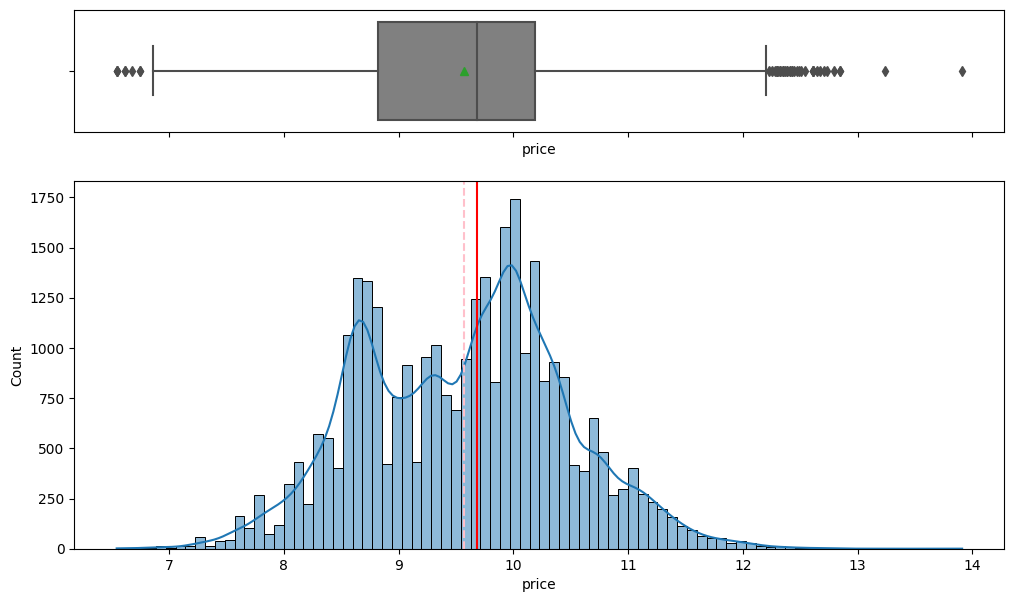

In [68]:
histogram_boxplot(df5, "price")

In [69]:
df5['color'] = df5['color'].str.lower()

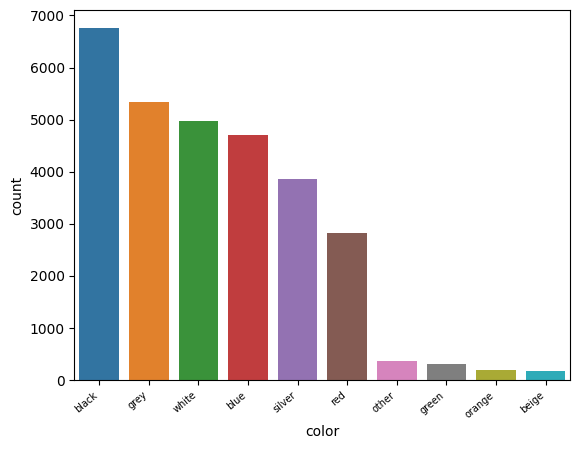

In [70]:
ax = sns.countplot(data=df5,x='color',order=df5['color'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

In [71]:
df5["color"].value_counts().iloc[:20]

black           6758
grey            5345
white           4967
blue            4698
silver          3851
red             2827
other            361
green            301
orange           191
beige            174
unknown          110
brown            106
yellow            87
gold              74
bronze            66
purple            43
turquoise         26
multicolour       25
frozen white      22
pure white        16
Name: color, dtype: int64

In [72]:
car_color= ['black', 'grey', 'white', 'blue', 'silver', 'red', 'other', 'green', 'orange', 'beige', 'unknown', 'brown', 'yellow', 'gold', 'bronze', 'purple', 'turquoise', 'multicolour']
pattern = '|'.join(car_color)

In [73]:
df5

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
0,XT-R D-4D,6.903,Manual,39.800,Diesel,2005,1995.000,117000,black,Estate,19,Toyota,RAV4
1,s 1.8 VVT-i SR Hatchback,6.908,Manual,39.200,Petrol,2007,1798.000,137669,red,Hatchback,17,Toyota,Yaris
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,7.090,Manual,62.800,Diesel,2012,2000.000,338345,silver,Other,12,Toyota,Avensis
3,a 1.4 S 3dr Hatchback,7.166,Manual,41.500,Petrol,2001,1398.000,59000,red,Hatchback,23,Toyota,Corolla
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,7.310,Manual,48.700,Petrol,2009,1329.000,134000,red,Hatchback,15,Toyota,Auris
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33837,1.5 Hybrid Design 5dr CVT Hatchback,9.740,Automatic,68.900,Hybrid,2020,1490.000,6798,blue,Hatchback,4,Toyota,Yaris
33838,s 1.5 Hybrid Design 5dr CVT Hatchback,9.754,Automatic,68.900,Hybrid,2021,1500.000,17027,black,Hatchback,3,Toyota,Yaris
33839,1.5 Hybrid Design 5dr CVT Hatchback,9.740,Automatic,68.900,Hybrid,2022,1490.000,21200,blue,Hatchback,2,Toyota,Yaris
33840,1.8 VVT-h GPF Icon Hatchback 5dr Petrol Hybrid...,9.723,Automatic,62.800,Hybrid,2021,1798.000,22000,blue,Hatchback,3,Toyota,Corolla


In [74]:
import re
df5['car_colors'] = df5['color'].str.extract(f'({pattern})', flags=re.IGNORECASE, expand=False).fillna('other')

In [75]:
df5.head()

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model,car_colors
0,XT-R D-4D,6.903,Manual,39.800,Diesel,2005,1995.000,117000,black,Estate,19,Toyota,RAV4,black
1,s 1.8 VVT-i SR Hatchback,6.908,Manual,39.200,Petrol,2007,1798.000,137669,red,Hatchback,17,Toyota,Yaris,red
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,7.090,Manual,62.800,Diesel,2012,2000.000,338345,silver,Other,12,Toyota,Avensis,silver
3,a 1.4 S 3dr Hatchback,7.166,Manual,41.500,Petrol,2001,1398.000,59000,red,Hatchback,23,Toyota,Corolla,red
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,7.310,Manual,48.700,Petrol,2009,1329.000,134000,red,Hatchback,15,Toyota,Auris,red


In [76]:
df5["car_colors"].value_counts()

black          7020
grey           5586
white          5183
blue           4916
silver         4001
red            2960
other           453
green           312
orange          210
beige           175
brown           112
unknown         110
yellow           94
gold             74
bronze           68
purple           48
turquoise        30
multicolour      25
Name: car_colors, dtype: int64

In [77]:
df5["car_colors"]= df5["car_colors"].str.replace("unknown","other")

In [78]:
df5["car_colors"].value_counts()

black          7020
grey           5586
white          5183
blue           4916
silver         4001
red            2960
other           563
green           312
orange          210
beige           175
brown           112
yellow           94
gold             74
bronze           68
purple           48
turquoise        30
multicolour      25
Name: car_colors, dtype: int64

In [79]:
df5 = df5.drop("color", axis=1)

In [80]:
df5.head()

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,type,age,car_brand,car_model,car_colors
0,XT-R D-4D,6.903,Manual,39.800,Diesel,2005,1995.000,117000,Estate,19,Toyota,RAV4,black
1,s 1.8 VVT-i SR Hatchback,6.908,Manual,39.200,Petrol,2007,1798.000,137669,Hatchback,17,Toyota,Yaris,red
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,7.090,Manual,62.800,Diesel,2012,2000.000,338345,Other,12,Toyota,Avensis,silver
3,a 1.4 S 3dr Hatchback,7.166,Manual,41.500,Petrol,2001,1398.000,59000,Hatchback,23,Toyota,Corolla,red
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,7.310,Manual,48.700,Petrol,2009,1329.000,134000,Hatchback,15,Toyota,Auris,red


In [81]:
df5.rename(columns={'price': 'log_price'}, inplace=True)

In [82]:
df5.head()

,model,log_price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,type,age,car_brand,car_model,car_colors
0,XT-R D-4D,6.903,Manual,39.800,Diesel,2005,1995.000,117000,Estate,19,Toyota,RAV4,black
1,s 1.8 VVT-i SR Hatchback,6.908,Manual,39.200,Petrol,2007,1798.000,137669,Hatchback,17,Toyota,Yaris,red
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,7.090,Manual,62.800,Diesel,2012,2000.000,338345,Other,12,Toyota,Avensis,silver
3,a 1.4 S 3dr Hatchback,7.166,Manual,41.500,Petrol,2001,1398.000,59000,Hatchback,23,Toyota,Corolla,red
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,7.310,Manual,48.700,Petrol,2009,1329.000,134000,Hatchback,15,Toyota,Auris,red


In [83]:
df5.groupby("car_brand")["milage"].mean()

car_brand
Audi            49656.669
BMW             54734.178
Ford            37559.306
Jaguar          52960.328
Land Rover      62630.969
Mazda           56193.332
Mercedes-Benz   67830.457
Mitsubishi      50947.839
Nissan          45184.248
Porsche         45285.354
Renault         48326.961
Skoda           45297.916
Suzuki          36679.586
Toyota          42480.720
Volkswagen      60708.929
Name: milage, dtype: float64

In [84]:
df5.groupby("car_brand")["age"].mean()

car_brand
Audi            6.504
BMW             7.467
Ford            5.883
Jaguar          8.246
Land Rover      8.136
Mazda           8.726
Mercedes-Benz   9.810
Mitsubishi      7.260
Nissan          6.890
Porsche         8.939
Renault         7.916
Skoda           6.405
Suzuki          7.153
Toyota          6.904
Volkswagen      8.773
Name: age, dtype: float64

In [85]:
df5["car_brand"].value_counts(ascending=False)

Audi             4232
Mercedes-Benz    3203
BMW              3087
Ford             2605
Nissan           2438
Toyota           2398
Jaguar           2174
Skoda            1774
Renault          1671
Volkswagen       1606
Land Rover       1600
Suzuki           1452
Porsche          1353
Mazda             926
Mitsubishi        805
Name: car_brand, dtype: int64

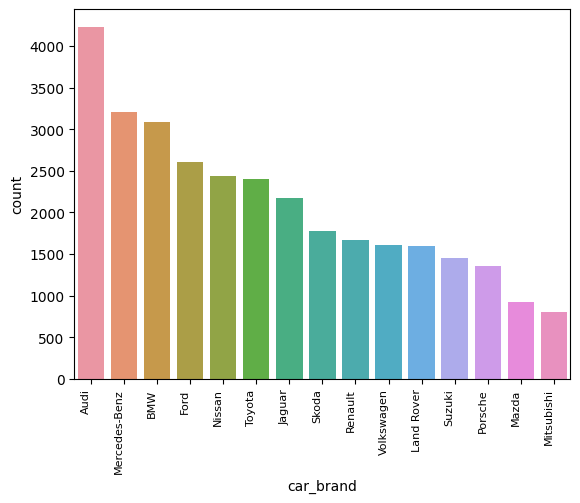

In [86]:
ax = sns.countplot(data=df5,x='car_brand',order=df5['car_brand'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)
plt.show()

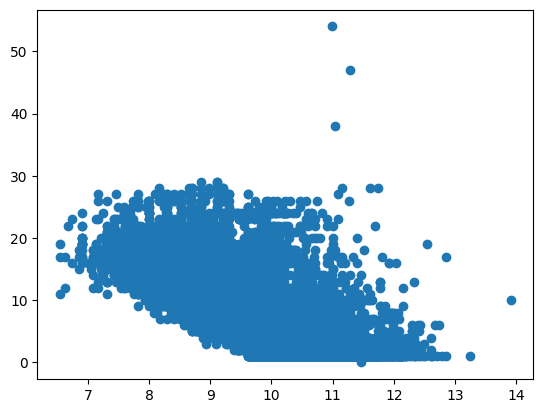

In [87]:
plt.scatter(df5.log_price,df5.age)

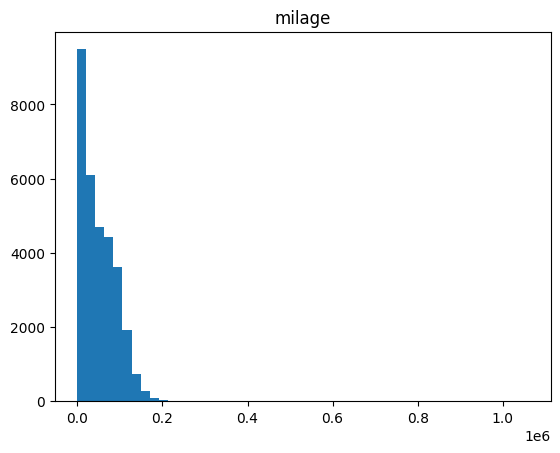

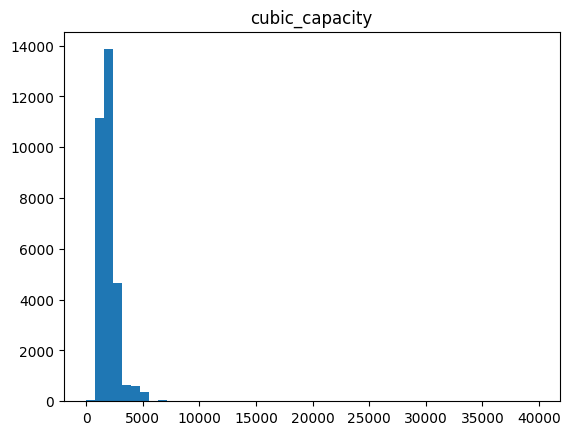

In [88]:
toLog =["milage", "cubic_capacity"]

for colname in toLog:
    plt.hist(df5[colname], bins=50)
    plt.title(colname)
    plt.show()

In [89]:
for colname in toLog:
    df5[colname + "_sqrt"] = np.sqrt(df5[colname])

df5.drop(toLog, axis=1, inplace=True)

In [90]:
df5.head()

,model,log_price,transmission,miles_per_gallaon,fuel,year,type,age,car_brand,car_model,car_colors,milage_sqrt,cubic_capacity_sqrt
0,XT-R D-4D,6.903,Manual,39.800,Diesel,2005,Estate,19,Toyota,RAV4,black,342.053,44.665
1,s 1.8 VVT-i SR Hatchback,6.908,Manual,39.200,Petrol,2007,Hatchback,17,Toyota,Yaris,red,371.038,42.403
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,7.090,Manual,62.800,Diesel,2012,Other,12,Toyota,Avensis,silver,581.674,44.721
3,a 1.4 S 3dr Hatchback,7.166,Manual,41.500,Petrol,2001,Hatchback,23,Toyota,Corolla,red,242.899,37.390
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,7.310,Manual,48.700,Petrol,2009,Hatchback,15,Toyota,Auris,red,366.060,36.455


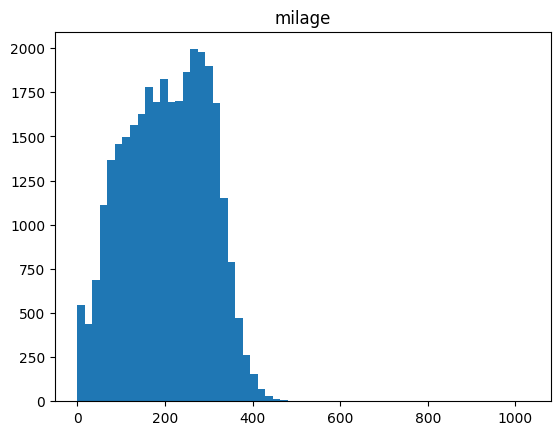

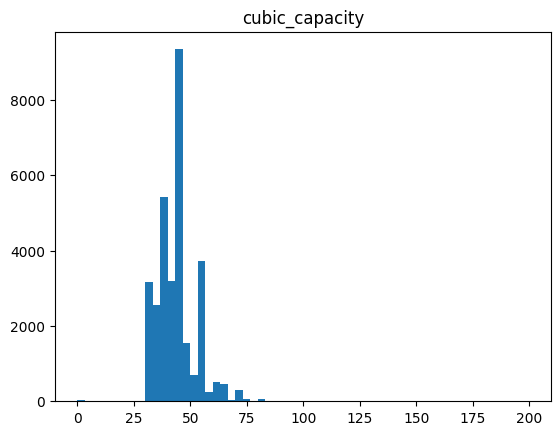

In [91]:
for colname in toLog:
    plt.hist(df5[colname + "_sqrt"], bins=60)
    plt.title(colname)
    plt.show()

In [92]:
def outliers(reff, col):
  Q1 = reff[col].quantile(0.25)  # 25th quantile
  Q3 = reff[col].quantile(0.75)  # 75th quantile
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - 1.5 * IQR
  Upper_Whisker = Q3 + 1.5 * IQR
  reff[col] = np.clip(reff[col], Lower_Whisker, Upper_Whisker)

  return reff

def treat_outliers(ref, col_list):

    for c in col_list:
        ref = outliers(ref, c)

    return ref

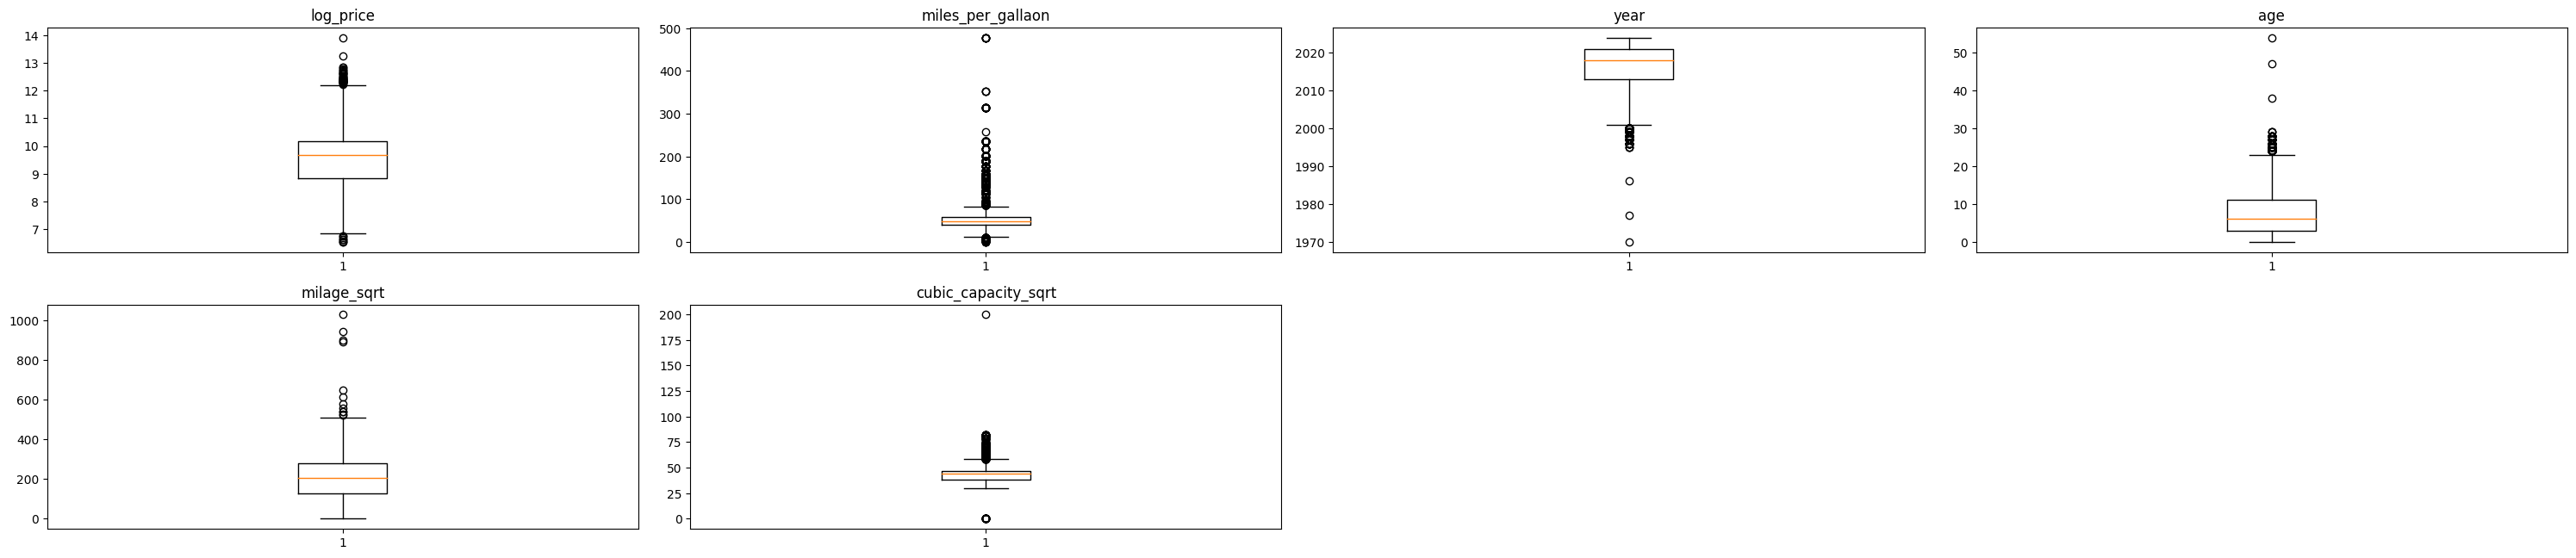

In [93]:
plt.figure(figsize=(30, 16))
for i, var in enumerate(df5.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df5[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

In [94]:
numerical_col = df5.select_dtypes(include=np.number).columns.tolist()
df6 = treat_outliers(df5, numerical_col)

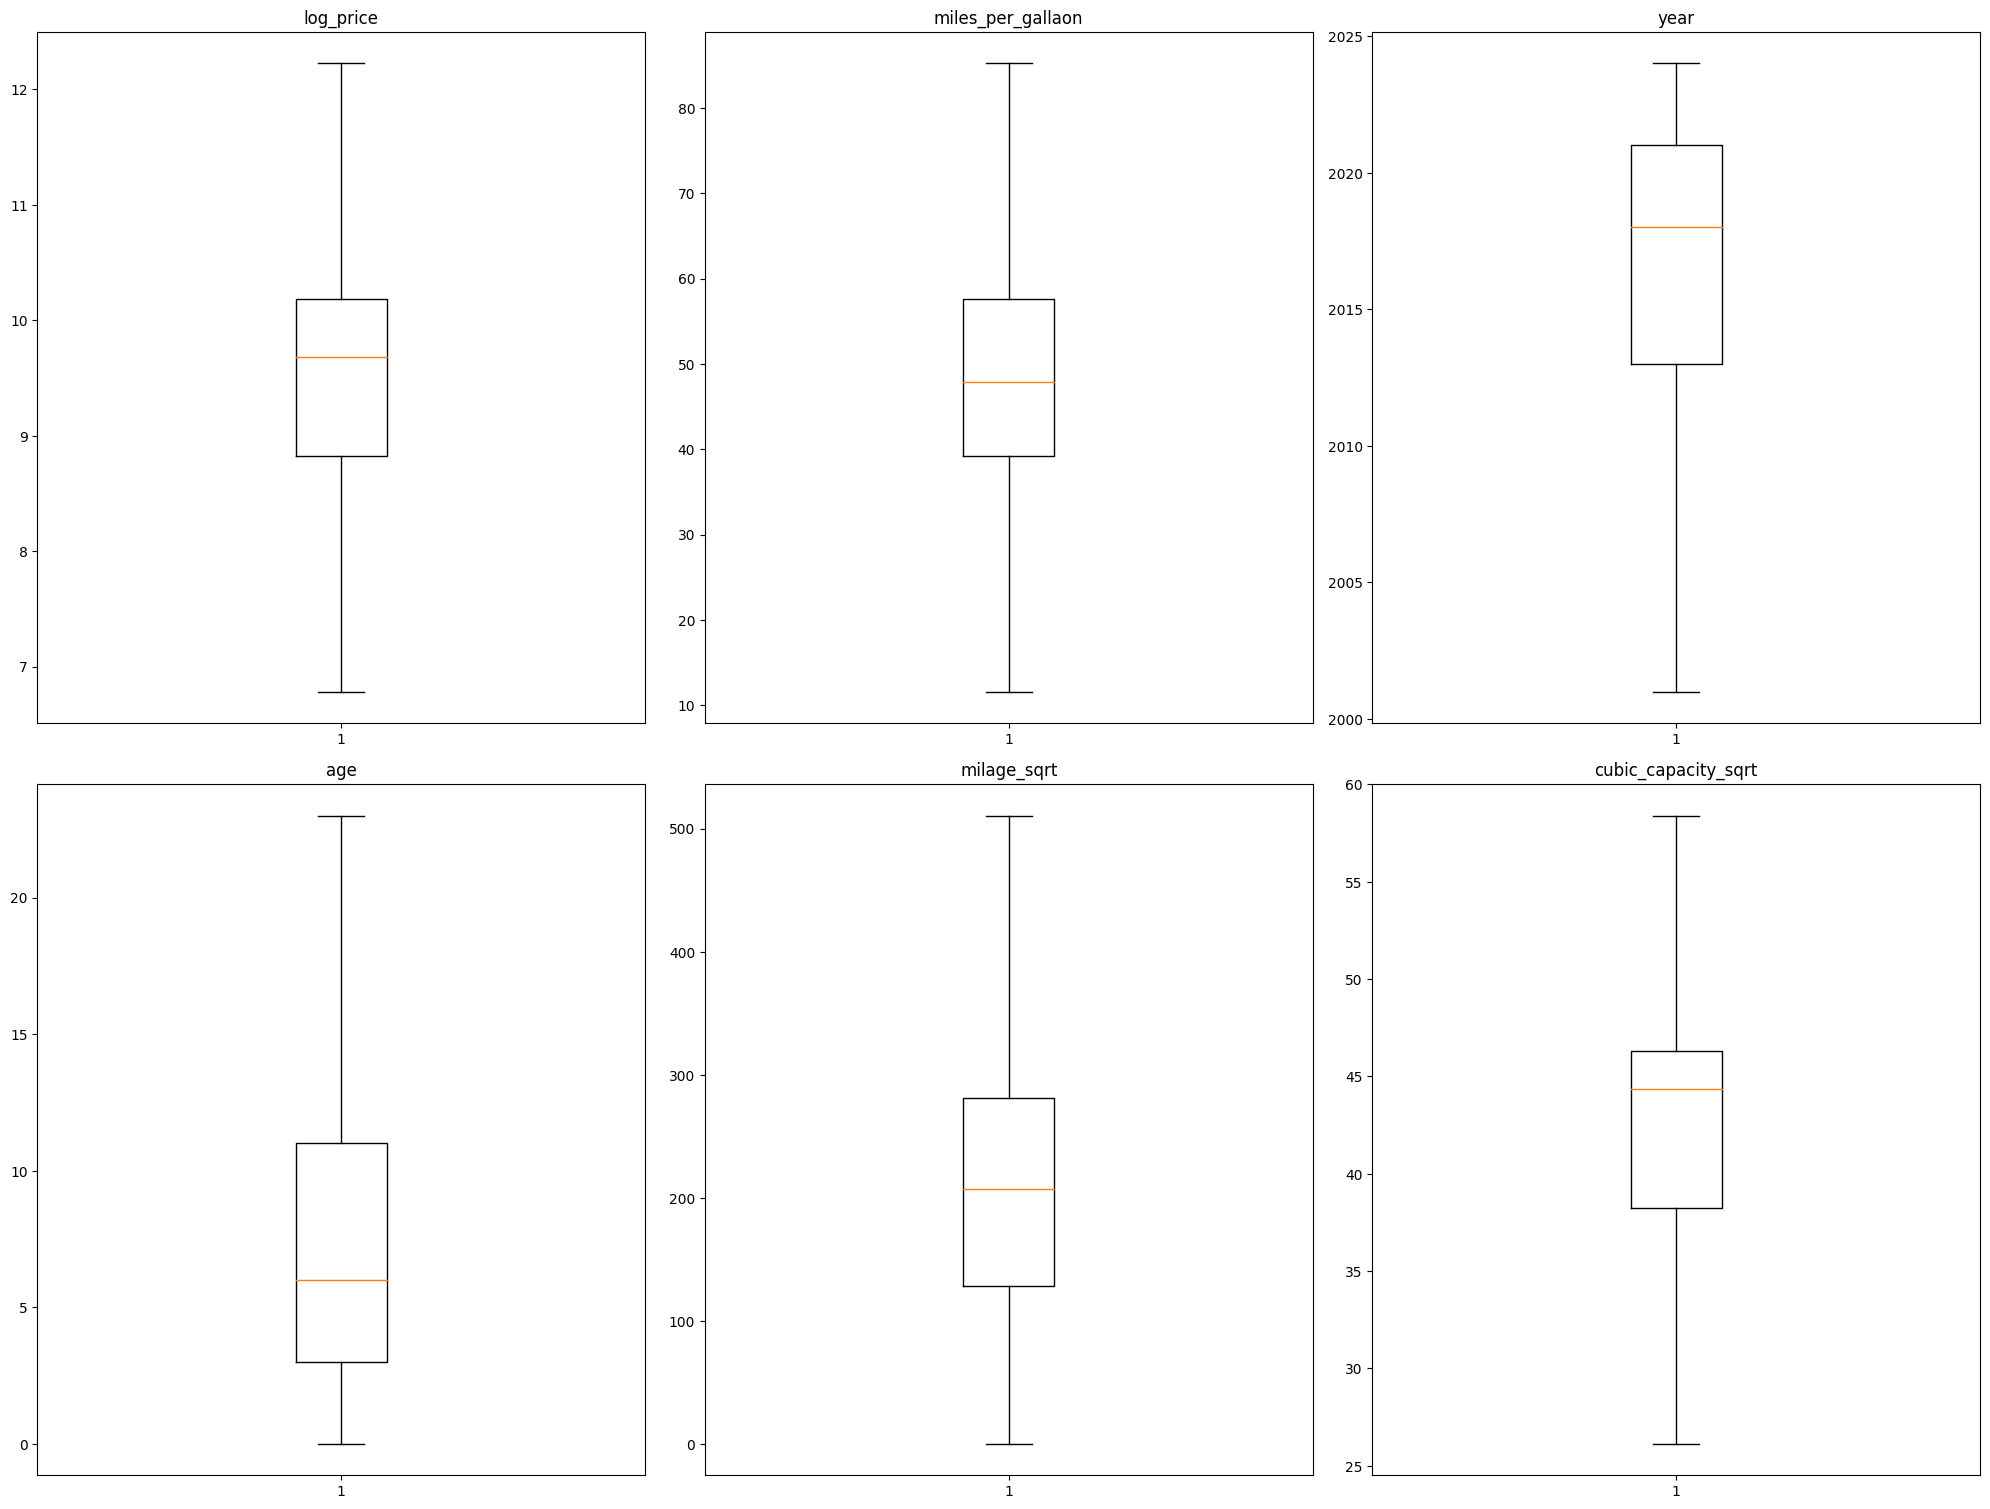

In [95]:
plt.figure(figsize=(20, 30))
for i, variable in enumerate(numerical_col):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df6[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [96]:
df6 = df6.drop("model", axis=1)

In [97]:
df6 = df6.drop("car_model", axis=1)

In [98]:
X = df6.drop(["log_price","year"], axis=1)
Y = df6["log_price"]
print(X.head())
print(Y.head())

  transmission  miles_per_gallaon    fuel       type  age car_brand  \
0       Manual             39.800  Diesel     Estate   19    Toyota   
1       Manual             39.200  Petrol  Hatchback   17    Toyota   
2       Manual             62.800  Diesel      Other   12    Toyota   
3       Manual             41.500  Petrol  Hatchback   23    Toyota   
4       Manual             48.700  Petrol  Hatchback   15    Toyota   

  car_colors  milage_sqrt  cubic_capacity_sqrt  
0      black      342.053               44.665  
1        red      371.038               42.403  
2     silver      510.580               44.721  
3        red      242.899               37.390  
4        red      366.060               36.455  
0   6.903
1   6.908
2   7.090
3   7.166
4   7.310
Name: log_price, dtype: float64


In [99]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X.shape)
X.head()

(31377, 56)


,miles_per_gallaon,age,milage_sqrt,cubic_capacity_sqrt,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuel_Hybrid,fuel_Other,fuel_Petrol,type_Convertible,type_Coupe,type_Crossover,type_Estate,type_Four Wheel Drive,type_Hatchback,type_MPV,type_Other,type_Passenger Carrier,type_People Carrier,type_Pick Up,type_Roadster,type_SUV,type_Saloon,type_Sports,type_Station Wagon,car_brand_BMW,car_brand_Ford,car_brand_Jaguar,car_brand_Land Rover,car_brand_Mazda,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_Porsche,car_brand_Renault,car_brand_Skoda,car_brand_Suzuki,car_brand_Toyota,car_brand_Volkswagen,car_colors_black,car_colors_blue,car_colors_bronze,car_colors_brown,car_colors_gold,car_colors_green,car_colors_grey,car_colors_multicolour,car_colors_orange,car_colors_other,car_colors_purple,car_colors_red,car_colors_silver,car_colors_turquoise,car_colors_white,car_colors_yellow
0,39.800,19,342.053,44.665,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39.200,17,371.038,42.403,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,62.800,12,510.580,44.721,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,41.500,23,242.899,37.390,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,48.700,15,366.060,36.455,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 23532
Number of rows in test data = 7845


In [101]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [102]:
pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), index = X_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])

,Coefficients
miles_per_gallaon,-0.003
age,-0.093
milage_sqrt,-0.003
cubic_capacity_sqrt,0.039
transmission_Manual,-0.098
transmission_Other,-0.048
transmission_Semi-Auto,-0.056
fuel_Hybrid,0.069
fuel_Other,0.208
fuel_Petrol,0.076


In [103]:
#function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


#function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


#function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    #predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [104]:
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, X_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.284,0.195,0.899,0.898,2.046


In [105]:
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.302,0.201,0.884,0.884,2.122


In [106]:
import statsmodels.api as sm
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3852.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:04:36   Log-Likelihood:                -3753.2
No. Observations:               23532   AIC:                             7616.
Df Residuals:                   23477   BIC:                             8060.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    #calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [109]:
checking_vif(X_train1)

,feature,VIF
0,const,960.944
1,miles_per_gallaon,2.452
2,age,3.145
3,milage_sqrt,3.114
4,cubic_capacity_sqrt,3.507
5,transmission_Manual,2.165
6,transmission_Other,1.077
7,transmission_Semi-Auto,1.468
8,fuel_Hybrid,1.725
9,fuel_Other,1.164


In [110]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [111]:
col_list = ["type_Convertible","type_Coupe", "type_Estate","type_Hatchback","type_MPV","type_Other","type_SUV", "type_Saloon", "car_colors_blue", "car_colors_black", "car_colors_grey", "car_colors_silver", "car_colors_red", "car_colors_white","type_Passenger Carrier","type_Four Wheel Drive"   ]

In [112]:
res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,type_Estate,0.898,0.284
1,type_Other,0.898,0.284
2,type_Coupe,0.898,0.284
3,type_Convertible,0.898,0.284
4,type_SUV,0.898,0.284
5,car_colors_silver,0.898,0.284
6,car_colors_red,0.898,0.284
7,car_colors_blue,0.898,0.284
8,car_colors_white,0.898,0.284
9,type_Four Wheel Drive,0.898,0.284


In [113]:
col_to_drop = "type_Estate"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  type_Estate


,feature,VIF
0,const,446.025
1,miles_per_gallaon,2.451
2,age,3.145
3,milage_sqrt,3.114
4,cubic_capacity_sqrt,3.507
5,transmission_Manual,2.165
6,transmission_Other,1.077
7,transmission_Semi-Auto,1.468
8,fuel_Hybrid,1.725
9,fuel_Other,1.164


In [114]:
col_list= ["car_colors_white", "car_colors_silver","car_colors_red","car_colors_grey","car_colors_blue","car_colors_black","type_Passenger Carrier", "type_Four Wheel Drive" ]
res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,car_colors_silver,0.898,0.284
1,car_colors_red,0.898,0.284
2,car_colors_blue,0.898,0.284
3,car_colors_white,0.898,0.284
4,type_Passenger Carrier,0.898,0.284
5,type_Four Wheel Drive,0.898,0.284
6,car_colors_black,0.898,0.284
7,car_colors_grey,0.898,0.284


In [115]:
col_to_drop = "car_colors_silver"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  car_colors_silver


,feature,VIF
0,const,254.824
1,miles_per_gallaon,2.451
2,age,3.145
3,milage_sqrt,3.114
4,cubic_capacity_sqrt,3.507
5,transmission_Manual,2.165
6,transmission_Other,1.077
7,transmission_Semi-Auto,1.468
8,fuel_Hybrid,1.724
9,fuel_Other,1.164


In [116]:
col_to_drop = "type_Four Wheel Drive"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  type_Four Wheel Drive


,feature,VIF
0,const,254.824
1,miles_per_gallaon,2.451
2,age,3.145
3,milage_sqrt,3.114
4,cubic_capacity_sqrt,3.507
5,transmission_Manual,2.165
6,transmission_Other,1.077
7,transmission_Semi-Auto,1.468
8,fuel_Hybrid,1.724
9,fuel_Other,1.164


In [119]:
col_to_drop = "type_Passenger Carrier"
X_train5 = X_train4.loc[:, ~X_train4.columns.str.startswith(col_to_drop)]
X_test5 = X_test4.loc[:, ~X_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  type_Passenger Carrier


,feature,VIF
0,const,254.824
1,miles_per_gallaon,2.451
2,age,3.145
3,milage_sqrt,3.114
4,cubic_capacity_sqrt,3.507
5,transmission_Manual,2.165
6,transmission_Other,1.077
7,transmission_Semi-Auto,1.468
8,fuel_Hybrid,1.724
9,fuel_Other,1.164


In [120]:
olsmod1 = sm.OLS(y_train, X_train5).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     4001.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:21:43   Log-Likelihood:                -3753.4
No. Observations:               23532   AIC:                             7613.
Df Residuals:                   23479   BIC:                             8040.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [121]:
# initial list of columns
cols = X_train5.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train5[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols  # variables with p-values lesser than 0.05
print(selected_features)

['const', 'miles_per_gallaon', 'age', 'milage_sqrt', 'cubic_capacity_sqrt', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuel_Hybrid', 'fuel_Other', 'fuel_Petrol', 'type_Hatchback', 'type_MPV', 'type_People Carrier', 'type_SUV', 'type_Saloon', 'car_brand_BMW', 'car_brand_Ford', 'car_brand_Jaguar', 'car_brand_Land Rover', 'car_brand_Mazda', 'car_brand_Mitsubishi', 'car_brand_Nissan', 'car_brand_Porsche', 'car_brand_Renault', 'car_brand_Skoda', 'car_brand_Suzuki', 'car_brand_Toyota', 'car_brand_Volkswagen', 'car_colors_black', 'car_colors_blue', 'car_colors_green', 'car_colors_grey', 'car_colors_multicolour', 'car_colors_purple', 'car_colors_red', 'car_colors_white', 'car_colors_yellow']


In [122]:
X_train6 = X_train5[selected_features]
X_test6 = X_test5[selected_features]

In [123]:
olsmod2 = sm.OLS(y_train, X_train6).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     5621.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:23:08   Log-Likelihood:                -3762.5
No. Observations:               23532   AIC:                             7601.
Df Residuals:                   23494   BIC:                             7907.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [124]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
10025,9.602,9.312,0.289
13749,8.411,8.414,-0.004
28469,10.518,10.656,-0.138
15408,10.383,10.155,0.227
30604,9.947,10.015,-0.068


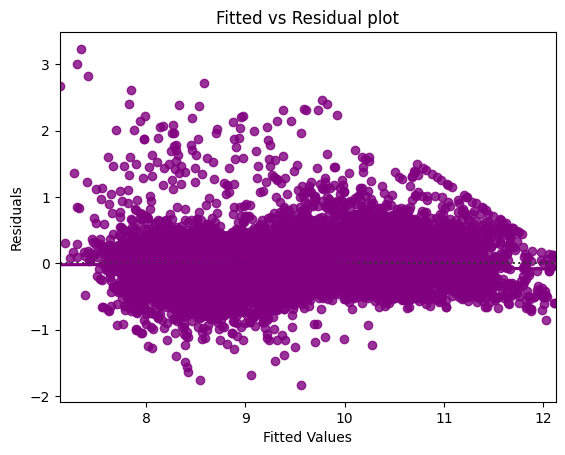

In [125]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

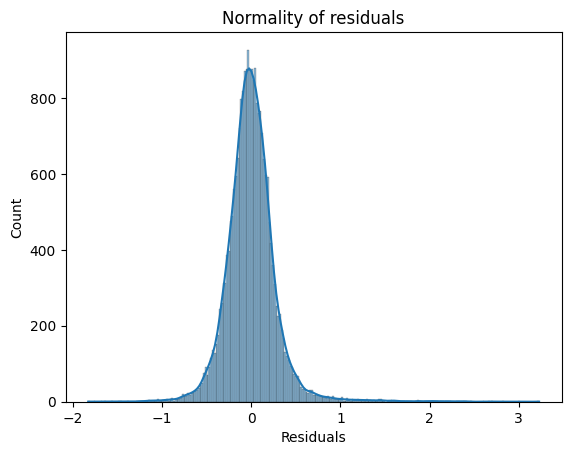

In [126]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

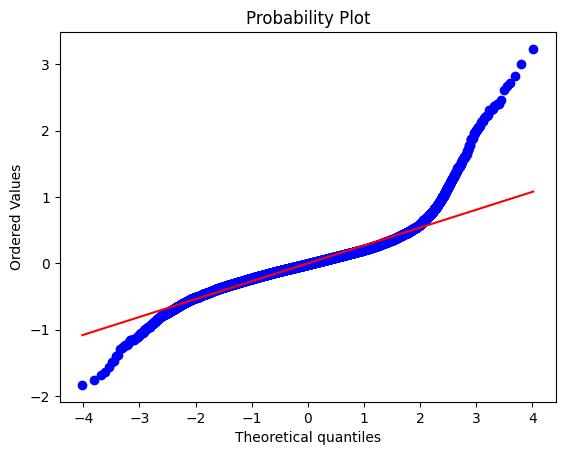

In [127]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [128]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8984630703926086, pvalue=0.0)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal

In [129]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train6)
lzip(name, test)

[('F statistic', 0.9261301834587782), ('p-value', 0.9999837171494027)]

residuals are homoscedastic

In [130]:
Equation = "Used Car Price ="
print(Equation, end=" ")
for i in range(len(X_train6.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(X_train6.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            X_train6.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", X_train6.columns[i], ")")

Used Car Price = 9.432 + ( -0.0028 )*( miles_per_gallaon ) +  ( -0.0938 )*( age ) +  ( -0.0029 )*( milage_sqrt ) +  ( 0.0392 )*( cubic_capacity_sqrt ) +  ( -0.0967 )*( transmission_Manual ) +  ( -0.0475 )*( transmission_Other ) +  ( -0.0545 )*( transmission_Semi-Auto ) +  ( 0.0668 )*( fuel_Hybrid ) +  ( 0.2062 )*( fuel_Other ) +  ( 0.0735 )*( fuel_Petrol ) +  ( -0.0621 )*( type_Hatchback ) +  ( 0.0584 )*( type_MPV ) +  ( 0.5804 )*( type_People Carrier ) +  ( 0.0296 )*( type_SUV ) +  ( -0.1104 )*( type_Saloon ) +  ( -0.0926 )*( car_brand_BMW ) +  ( -0.1862 )*( car_brand_Ford ) +  ( -0.0653 )*( car_brand_Jaguar ) +  ( 0.0583 )*( car_brand_Land Rover ) +  ( -0.313 )*( car_brand_Mazda ) +  ( -0.3227 )*( car_brand_Mitsubishi ) +  ( -0.2843 )*( car_brand_Nissan ) +  ( 0.4724 )*( car_brand_Porsche ) +  ( -0.3825 )*( car_brand_Renault ) +  ( -0.2428 )*( car_brand_Skoda ) +  ( -0.3859 )*( car_brand_Suzuki ) +  ( -0.2844 )*( car_brand_Toyota ) +  ( -0.1655 )*( car_brand_Volkswagen ) +  ( 0.0461 

In [131]:
pred = olsmod2.predict(X_test6)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=42)

,Actual,Predicted
11338,8.740,8.632
5344,8.853,8.460
13056,9.480,9.913
19501,8.779,8.714
20044,9.314,9.201
1811,8.699,9.740
20406,9.392,9.217
11170,8.566,8.563
23139,10.386,9.914
3709,8.612,8.699


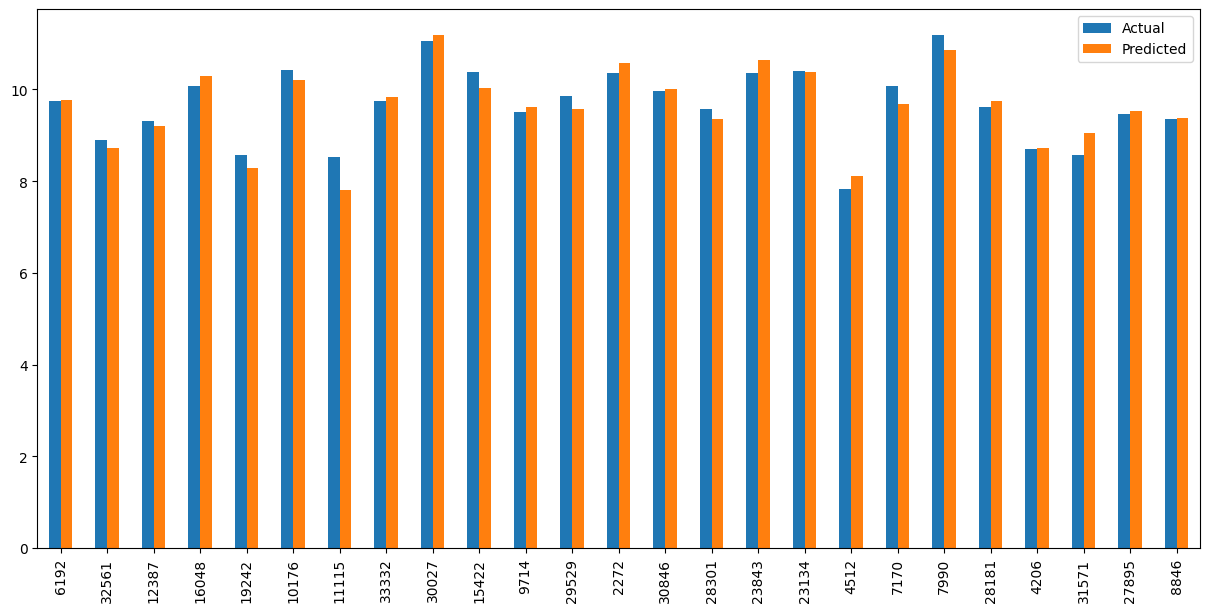

In [132]:
df_pred = df_pred_test.sample(25, random_state=1)
df_pred.plot(kind="bar", figsize=(15, 7))
plt.show()

In [133]:
olsmod2_train_perf = model_performance_regression(olsmod2, X_train6, y_train)
olsmod2_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.284,0.195,0.899,0.898,2.047
